In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import glob

In [27]:
#####NPY making routine
files = glob.glob('D:\\OneDrive\\CCA\\CEAS\\log_04nov21_145518\\*.TXT')
for ii,filename in enumerate(files):
    counts = []
    if ii==0:
        wavelength = []
        with open(filename) as file:
            lineas=file.readlines()
            lineas=lineas[8:-1]
        for line in lineas:
            lines=line.split(';')
            wavelength.append(float(lines[0]))
            counts.append(float(lines[1]))
        spectra=np.concatenate((np.array(wavelength,ndmin=2).T,np.array(counts,ndmin=2).T),axis=1)
    else:
        with open(filename) as file:
            lineas=file.readlines()
            lineas=lineas[8:-1]
        for line in lineas:
            lines=line.split(';')
            counts.append(float(lines[1]))
        spectra=np.concatenate((spectra,np.array(counts,ndmin=2).T),axis=1)
np.save("CEASline1",spectra)

In [24]:
##### Spectra handling

In [3]:
ceaspec = np.load('CEASline1.npy')
#print(ceaspec.shape,ceaspec)

In [4]:
cols=len(ceaspec[0,:])
tocol = 11
fromcol = 1
ceaspecacc10=np.copy(ceaspec[:,0]).reshape(len(ceaspec[:,0]),1)

while tocol<=cols:
    #print(fromcol,tocol)
    suma=np.sum(ceaspec[:,fromcol:tocol],axis=1,keepdims=1)
    ceaspecacc10=np.concatenate((ceaspecacc10,suma),axis=1)
    tocol=tocol+10
    fromcol=fromcol+10
ceaspecacc10.shape

(3648, 61)

In [5]:
cols=len(ceaspec[0,:])
tocol = 21
fromcol = 1
ceaspecacc20=np.copy(ceaspec[:,0]).reshape(len(ceaspec[:,0]),1)

while tocol<=cols:
    #print(fromcol,tocol)
    suma=np.sum(ceaspec[:,fromcol:tocol],axis=1,keepdims=1)
    ceaspecacc20=np.concatenate((ceaspecacc20,suma),axis=1)
    tocol=tocol+20
    fromcol=fromcol+20
ceaspecacc20.shape

(3648, 31)

In [6]:
ceaspecacc20

array([[  247.5 , -4129.  , -3609.  , ..., -3772.  , -3672.  , -3703.  ],
       [  247.67,  2311.  ,  2423.  , ...,  2478.  ,  2477.  ,  2073.  ],
       [  247.84,   139.  ,   183.  , ...,   384.  ,   572.  ,     9.  ],
       ...,
       [  811.63, -4533.  , -5305.  , ..., -4782.  , -5099.  , -4795.  ],
       [  811.76,   655.  ,   719.  , ...,   644.  ,   740.  ,   877.  ],
       [  811.9 ,  -993.  , -1021.  , ...,  -666.  ,  -683.  , -1083.  ]])

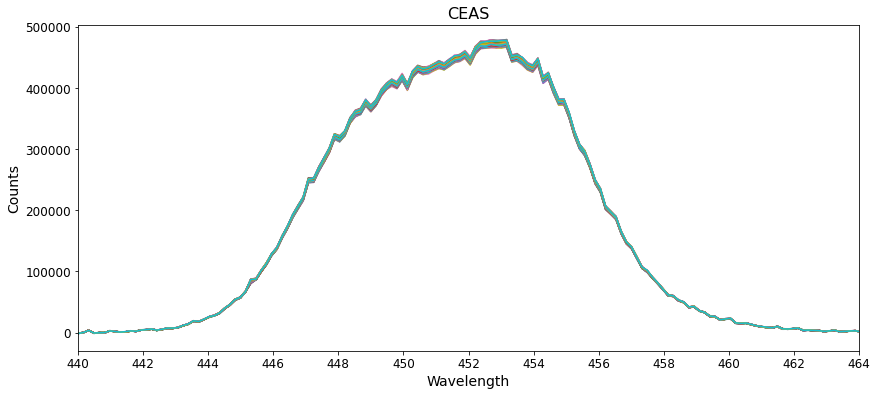

In [7]:
cols=len(ceaspecacc10[0,:])
col = 1

f, ax0 = plt.subplots(figsize=(14,6))

while col < cols:
    ax0.plot(ceaspecacc10[:,0],ceaspecacc10[:,col])
    col = col+1

## Formatting 
ax0.set_xlim(440,464)
ax0.set_xticks(np.arange(440,466,2))
ax0.set_xlabel('Wavelength',size=14)
#ax0.set_ylabel('molecule/cm$^2$',size=14)
ax0.set_ylabel('Counts',size=14)
ax0.set_title("CEAS",size=16)
#ax0.legend(fontsize=12, loc='upper left')
ax0.tick_params(labelsize=12)

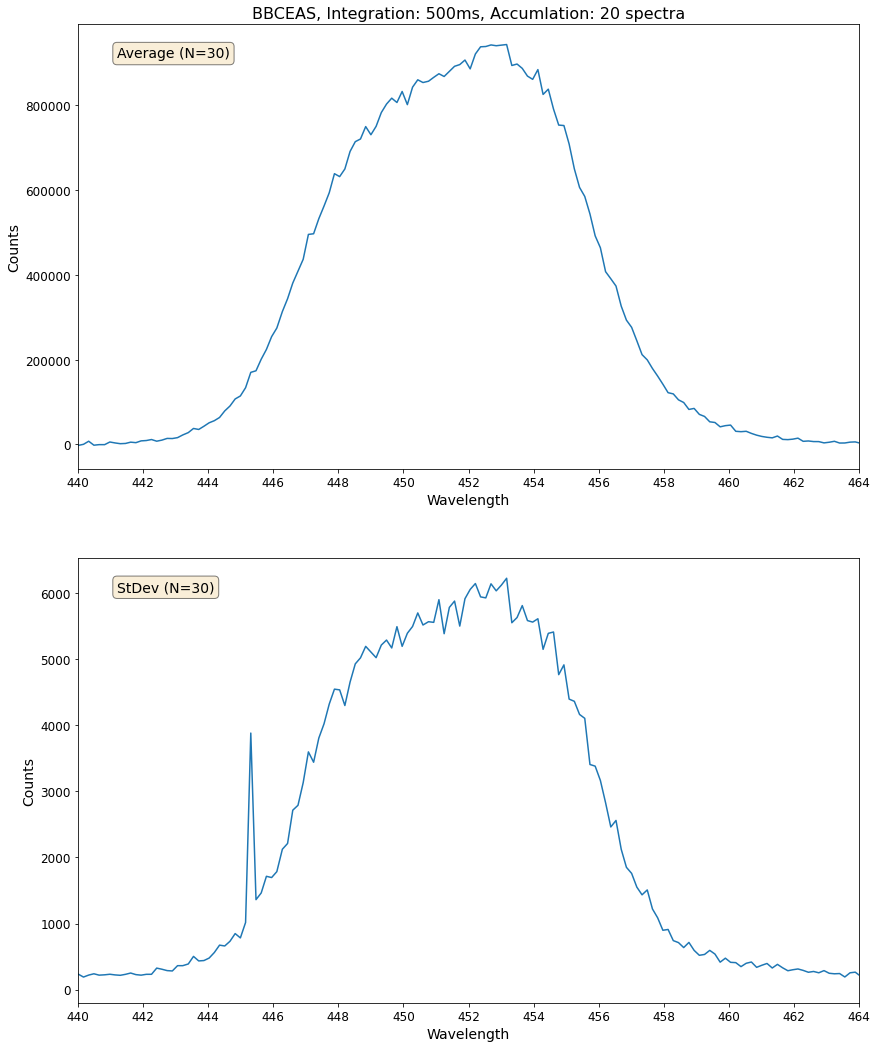

In [8]:
plt.figure(figsize=(14,18)) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ceasavg=np.average(ceaspecacc20[:,1:],axis=1)
ceasstd=np.std(ceaspecacc20[:,1:],axis=1)

ax0 = plt.subplot(2, 1, 1) 
ax0.plot(ceaspecacc20[:,0], ceasavg)

## Formatting 
ax0.set_xlim(440,464)
ax0.set_xticks(np.arange(440,466,2))
ax0.set_xlabel('Wavelength',size=14)
#ax0.set_ylabel('molecule/cm$^2$',size=14)
ax0.set_ylabel('Counts',size=14)
ax0.set_title("BBCEAS, Integration: 500ms, Accumlation: 20 spectra",size=16)
#ax0.legend(fontsize=12, loc='upper left')
ax0.tick_params(labelsize=12)
ax0.text(0.05, 0.95, 'Average (N=30)', transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax1 = plt.subplot(2, 1, 2) 
ax1.plot(ceaspecacc20[:,0], ceasstd)

## Formatting 
ax1.set_xlim(440,464)
ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)


ax1.text(0.05, 0.95, 'StDev (N=30)', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.savefig('BBCEASacc20.png')

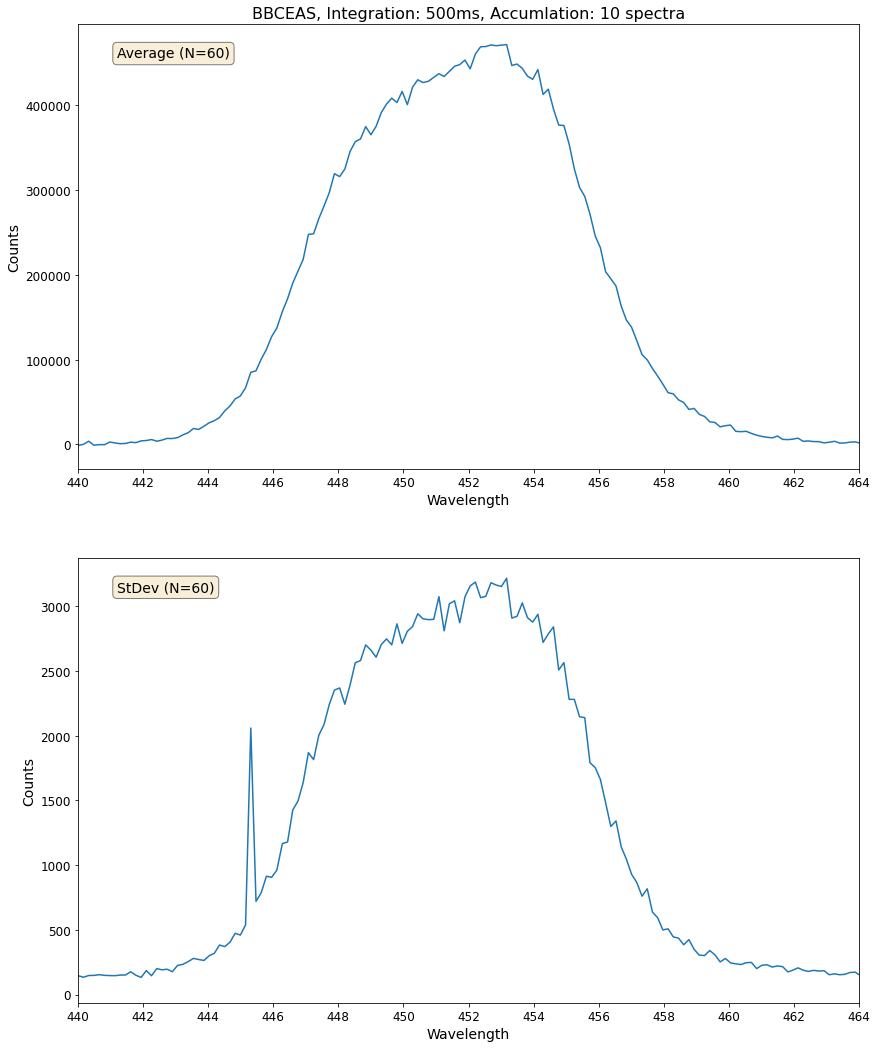

In [9]:
plt.figure(figsize=(14,18)) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ceasavg=np.average(ceaspecacc10[:,1:],axis=1)
ceasstd=np.std(ceaspecacc10[:,1:],axis=1)

ax0 = plt.subplot(2, 1, 1) 
ax0.plot(ceaspecacc10[:,0], ceasavg)

## Formatting 
ax0.set_xlim(440,464)
ax0.set_xticks(np.arange(440,466,2))
ax0.set_xlabel('Wavelength',size=14)
#ax0.set_ylabel('molecule/cm$^2$',size=14)
ax0.set_ylabel('Counts',size=14)
ax0.set_title("BBCEAS, Integration: 500ms, Accumlation: 10 spectra",size=16)
#ax0.legend(fontsize=12, loc='upper left')
ax0.tick_params(labelsize=12)
ax0.text(0.05, 0.95, 'Average (N=60)', transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax1 = plt.subplot(2, 1, 2) 
ax1.plot(ceaspecacc10[:,0], ceasstd)

## Formatting 
ax1.set_xlim(440,464)
ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)


ax1.text(0.05, 0.95, 'StDev (N=60)', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.savefig('BBCEASacc10.png')

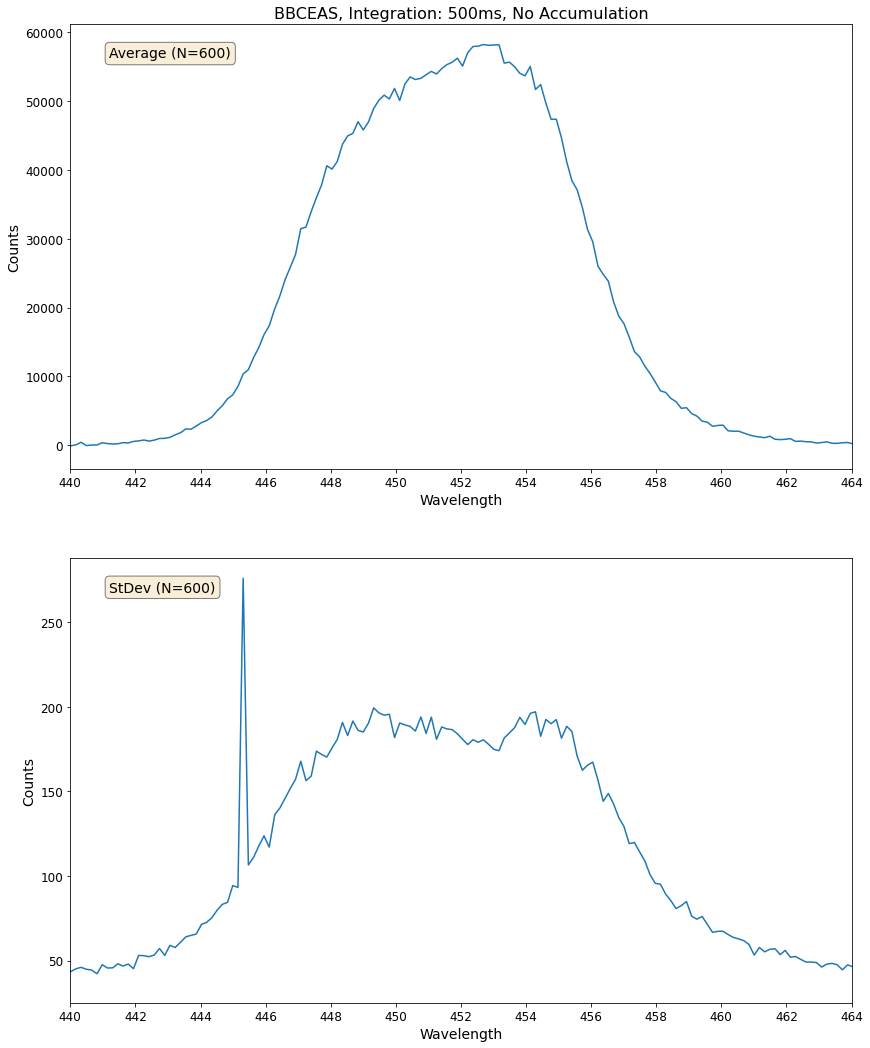

In [35]:
plt.figure(figsize=(14,18)) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ceasavg=np.average(ceaspec[:,1:],axis=1)
ceasstd=np.std(ceaspec[:,1:],axis=1)

ax0 = plt.subplot(2, 1, 1) 
ax0.plot(ceaspec[:,0], ceasavg)

## Formatting 
ax0.set_xlim(440,464)
ax0.set_xticks(np.arange(440,466,2))
ax0.set_xlabel('Wavelength',size=14)
#ax0.set_ylabel('molecule/cm$^2$',size=14)
ax0.set_ylabel('Counts',size=14)
ax0.set_title("BBCEAS, Integration: 500ms, No Accumulation",size=16)
#ax0.legend(fontsize=12, loc='upper left')
ax0.tick_params(labelsize=12)
ax0.text(0.05, 0.95, 'Average (N=600)', transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax1 = plt.subplot(2, 1, 2) 
ax1.plot(ceaspec[:,0], ceasstd)

## Formatting 
ax1.set_xlim(440,464)
ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
ax1.text(0.05, 0.95, 'StDev (N=600)', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.savefig('BBCEASacc1.png')

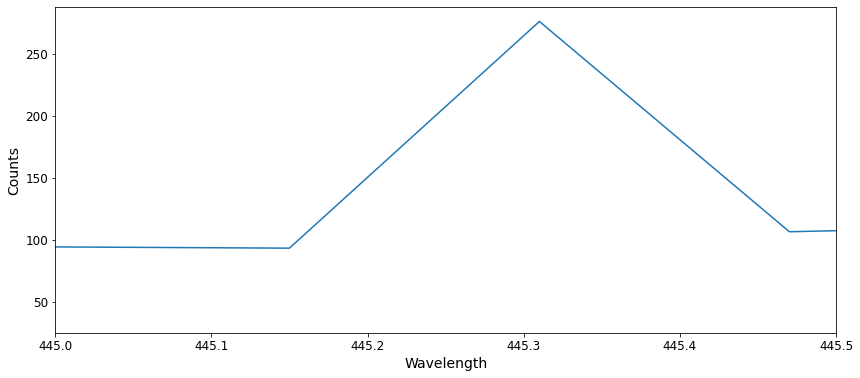

In [36]:
f, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(ceaspec[:,0], ceasstd)
ax1.set_xlim(445,445.5)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)

In [ ]:
##### Spectra comparison

In [63]:
ceaspec = np.load('CEASbckg2.npy')
#print(ceaspec.shape,ceaspec)
cols=len(ceaspec[0,:])
tocol = 21
fromcol = 1
bckg=np.copy(ceaspec[:,0]).reshape(len(ceaspec[:,0]),1)

while tocol<=cols:
    #print(fromcol,tocol)
    suma=np.sum(ceaspec[:,fromcol:tocol],axis=1,keepdims=1)
    bckg=np.concatenate((bckg,suma),axis=1)
    tocol=tocol+20
    fromcol=fromcol+20

print(bckg.shape)

ceaspec = np.load('CEASline1.npy')
#print(ceaspec.shape,ceaspec)
cols=len(ceaspec[0,:])
tocol = 21
fromcol = 1
line=np.copy(ceaspec[:,0]).reshape(len(ceaspec[:,0]),1)

while tocol<=cols:
    #print(fromcol,tocol)
    suma=np.sum(ceaspec[:,fromcol:tocol],axis=1,keepdims=1)
    line=np.concatenate((line,suma),axis=1)
    tocol=tocol+20
    fromcol=fromcol+20
print(line.shape)

(3648, 31)
(3648, 31)


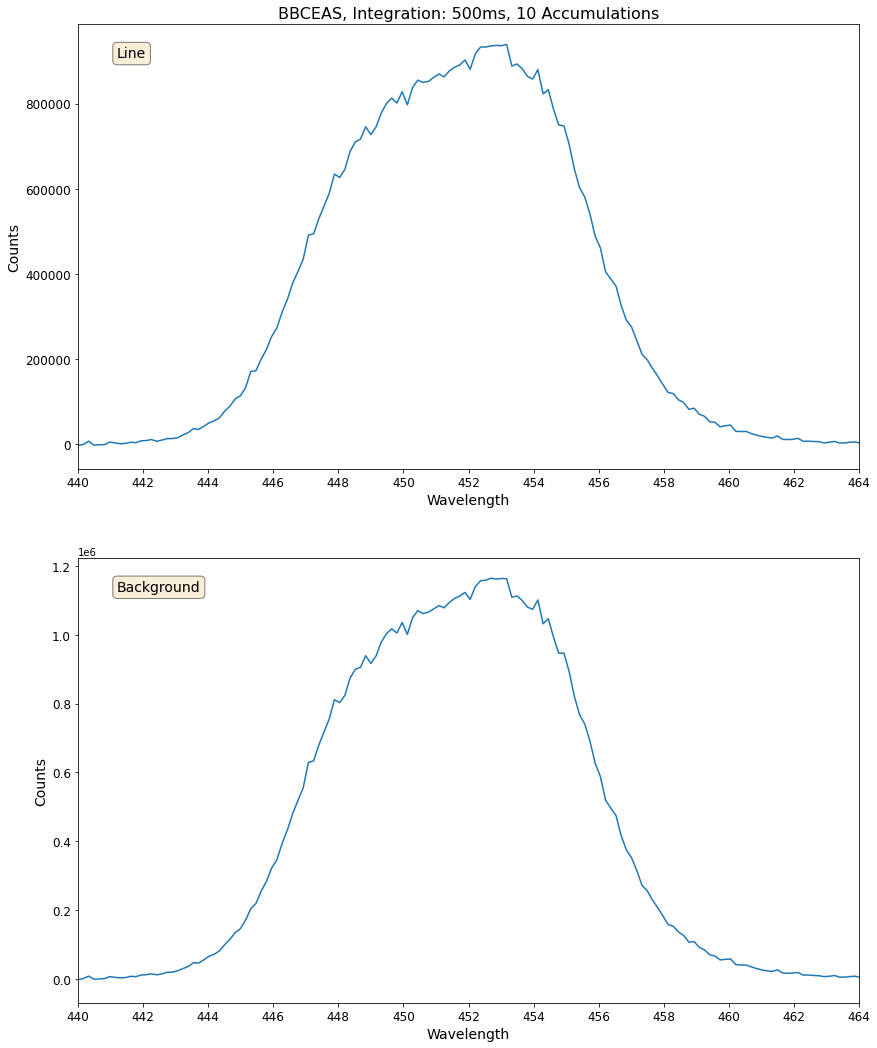

In [64]:
plt.figure(figsize=(14,18)) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
y1=line[:,1]
y2=bckg[:,1]

ax0 = plt.subplot(2, 1, 1) 
ax0.plot(ceaspec[:,0], y1)

## Formatting 
ax0.set_xlim(440,464)
ax0.set_xticks(np.arange(440,466,2))
ax0.set_xlabel('Wavelength',size=14)
#ax0.set_ylabel('molecule/cm$^2$',size=14)
ax0.set_ylabel('Counts',size=14)
ax0.set_title("BBCEAS, Integration: 500ms, 10 Accumulations",size=16)
#ax0.legend(fontsize=12, loc='upper left')
ax0.tick_params(labelsize=12)
ax0.text(0.05, 0.95, 'Line', transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax1 = plt.subplot(2, 1, 2) 
ax1.plot(ceaspec[:,0], y2)

## Formatting 
ax1.set_xlim(440,464)
ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
ax1.text(0.05, 0.95, 'Background', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.savefig('BBCEASacc1.png')

In [10]:
Reff=0.99985
Iratio=y2/y1
alpha=(1/70)*(Iratio-1)*(1-Reff)

f, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(ceaspec[:,0], alpha)
ax1.set_xlim(440,460)
ax1.set_xticks(np.arange(444,458,2))
ax1.set_ylim(4e-7,9e-7)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('molecule/cm$^2$',size=14)
ax1.set_ylabel('Counts',size=14)
#ax1.set_title("CEAS",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)

NameError: name 'y2' is not defined

In [42]:
alpha

array([ 3.91262214e-07,  2.25669019e-07, -4.12961211e-06, ...,
        2.43609023e-08,  5.46921698e-07,  2.71726668e-07])